In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

my_predictions = {}
r2_predictions = {}
mae_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def r2_eval(name_, pred, actual):
    global r2_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    r2 = r2_score(pred, actual)
    r2_predictions[name_] = r2

    y_value = sorted(r2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_r2_model(name_, pred, actual):
    global r2_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    r2 = r2_score(pred, actual)
    r2_predictions[name_] = r2
    
def r2_eval(name_, pred, actual):
    global mae_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mae = mean_absolute_error(pred, actual)
    mae_predictions[name_] = mae

    y_value = sorted(mae_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('mae score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_mae_model(name_, pred, actual):
    global mae_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mae = mean_absolute_error(pred, actual)
    mae_predictions[name_] = mae

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def r2_plot_all():
    global r2_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(r2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def mae_plot_all():
    global mae_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(mae_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('mae score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

### 계수 시각화 코드

In [133]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

def plot_coef(columns, coef):
    # 데이터 프레임 만드는 코드
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    # 시각화 코드
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

# 1. 데이터를 불러옴 

In [134]:
df = pd.read_csv("../../data/매물데이터/20212022합침.csv")
df.info()

C:\Users\sujong\AppData\Local\Temp\ipykernel_19940\57158935.py:1: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/매물데이터/20212022합침.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900862 entries, 0 to 900861
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900862 non-null  int64  
 1   접수연도        900862 non-null  int64  
 2   자치구코드       900862 non-null  int64  
 3   자치구명        900829 non-null  object 
 4   법정동코드       900862 non-null  int64  
 5   법정동명        900829 non-null  object 
 6   지번구분        625302 non-null  float64
 7   지번구분명       625302 non-null  object 
 8   본번          625586 non-null  float64
 9   부번          625586 non-null  float64
 10  층           625336 non-null  float64
 11  계약일         900862 non-null  int64  
 12  전월세 구분      900862 non-null  object 
 13  임대면적(㎡)     900862 non-null  float64
 14  보증금(만원)     900862 non-null  int64  
 15  임대료(만원)     900862 non-null  int64  
 16  건물명         625377 non-null  object 
 17  건축년도        884688 non-null  float64
 18  건물용도        900862 non-null  object 
 19  계약

In [168]:
# songpa_dum.head()

,Unnamed: 0,predict
122936,122936,59.860171
123230,123230,51.675516
124487,124487,55.683961
124740,124740,67.312626
124794,124794,63.089617


In [169]:
# noapart = pd.merge(songpa_dum,df, on='Unnamed: 0',how='left')
# noapart.to_csv('../../data/매물데이터/아파트없는 월세 매물.csv')

In [167]:
# songpa_dum.drop(['층', '임대면적(㎡)', '보증금(만원)', '임대료(만원)', '건축년도', '종전 보증금', '종전 임대료', '법정동명_가락동', '법정동명_가리봉동', '법정동명_가산동', '법정동명_가양동', '법정동명_가회동', '법정동명_갈월동', '법정동명_갈현동', '법정동명_강일동', '법정동명_개봉동', '법정동명_개포동', '법정동명_개화동', '법정동명_거여동', '법정동명_경운동', '법정동명_계동', '법정동명_고덕동', '법정동명_고척동', '법정동명_공덕동', '법정동명_공릉동', '법정동명_공항동', '법정동명_관수동', '법정동명_광장동', '법정동명_교북동', '법정동명_구기동', '법정동명_구로동', '법정동명_구산동', '법정동명_구수동', '법정동명_구의동', '법정동명_군자동', '법정동명_궁동', '법정동명_금호동1가', '법정동명_금호동2가', '법정동명_금호동3가', '법정동명_금호동4가', '법정동명_길동', '법정동명_길음동', '법정동명_남가좌동', '법정동명_남대문로5가', '법정동명_남산동2가', '법정동명_남영동', '법정동명_남현동', '법정동명_내곡동', '법정동명_내발산동', '법정동명_내수동', '법정동명_냉천동', '법정동명_노고산동', '법정동명_노량진동', '법정동명_녹번동', '법정동명_논현동', '법정동명_누상동', '법정동명_능동', '법정동명_답십리동', '법정동명_당산동', '법정동명_당산동1가', '법정동명_당산동2가', '법정동명_당산동3가', '법정동명_당산동4가', '법정동명_당산동5가', '법정동명_당산동6가', '법정동명_당인동', '법정동명_대림동', '법정동명_대방동', '법정동명_대신동', '법정동명_대조동', '법정동명_대치동', '법정동명_대현동', '법정동명_대흥동', '법정동명_도곡동', '법정동명_도림동', '법정동명_도봉동', '법정동명_도선동', '법정동명_도원동', '법정동명_도화동', '법정동명_독산동', '법정동명_돈암동', '법정동명_동교동', '법정동명_동빙고동', '법정동명_동선동2가', '법정동명_동선동3가', '법정동명_동선동4가', '법정동명_동선동5가', '법정동명_동소문동1가', '법정동명_동소문동4가', '법정동명_동소문동5가', '법정동명_동소문동6가', '법정동명_동소문동7가', '법정동명_동숭동', '법정동명_동자동', '법정동명_동작동', '법정동명_둔촌동', '법정동명_등촌동', '법정동명_마곡동', '법정동명_마장동', '법정동명_마천동', '법정동명_마포동', '법정동명_만리동1가', '법정동명_만리동2가', '법정동명_망우동', '법정동명_망원동', '법정동명_면목동', '법정동명_명륜1가', '법정동명_명륜2가', '법정동명_명륜3가', '법정동명_명일동', '법정동명_목동', '법정동명_무악동', '법정동명_묵동', '법정동명_문래동3가', '법정동명_문래동4가', '법정동명_문래동5가', '법정동명_문래동6가', '법정동명_문배동', '법정동명_문정동', '법정동명_미근동', '법정동명_미아동', '법정동명_반포동', '법정동명_방배동', '법정동명_방이동', '법정동명_방학동', '법정동명_방화동', '법정동명_번동', '법정동명_보광동', '법정동명_보문동1가', '법정동명_보문동2가', '법정동명_보문동3가', '법정동명_보문동4가', '법정동명_보문동6가', '법정동명_보문동7가', '법정동명_본동', '법정동명_봉원동', '법정동명_봉천동', '법정동명_부암동', '법정동명_북가좌동', '법정동명_북아현동', '법정동명_불광동', '법정동명_사근동', '법정동명_사당동', '법정동명_사직동', '법정동명_산천동', '법정동명_삼선동1가', '법정동명_삼선동2가', '법정동명_삼선동3가', '법정동명_삼선동4가', '법정동명_삼선동5가', '법정동명_삼성동', '법정동명_삼전동', '법정동명_상계동', '법정동명_상도1동', '법정동명_상도동', '법정동명_상봉동', '법정동명_상수동', '법정동명_상암동', '법정동명_상왕십리동', '법정동명_상월곡동', '법정동명_상일동', '법정동명_서계동', '법정동명_서교동', '법정동명_서빙고동', '법정동명_서초동', '법정동명_석관동', '법정동명_석촌동', '법정동명_성내동', '법정동명_성북동', '법정동명_성북동1가', '법정동명_성산동', '법정동명_성수동1가', '법정동명_성수동2가', '법정동명_세곡동', '법정동명_송정동', '법정동명_송파동', '법정동명_수색동', '법정동명_수서동', '법정동명_수유동', '법정동명_순화동', '법정동명_숭인동', '법정동명_시흥동', '법정동명_신계동', '법정동명_신공덕동', '법정동명_신교동', '법정동명_신길동', '법정동명_신내동', '법정동명_신당동', '법정동명_신대방동', '법정동명_신도림동', '법정동명_신림동', '법정동명_신문로2가', '법정동명_신사동', '법정동명_신설동', '법정동명_신수동', '법정동명_신영동', '법정동명_신원동', '법정동명_신월동', '법정동명_신정동', '법정동명_신창동', '법정동명_신천동', '법정동명_쌍문동', '법정동명_아현동', '법정동명_안국동', '법정동명_안암동1가', '법정동명_안암동2가', '법정동명_안암동5가', '법정동명_암사동', '법정동명_압구정동', '법정동명_양재동', '법정동명_양평동1가', '법정동명_양평동2가', '법정동명_양평동3가', '법정동명_양평동4가', '법정동명_양평동5가', '법정동명_양평동6가', '법정동명_여의도동', '법정동명_역삼동', '법정동명_역촌동', '법정동명_연건동', '법정동명_연남동', '법정동명_연희동', '법정동명_염곡동', '법정동명_염리동', '법정동명_염창동', '법정동명_영등포동', '법정동명_영등포동1가', '법정동명_영등포동2가', '법정동명_영등포동3가', '법정동명_영등포동4가', '법정동명_영등포동5가', '법정동명_영등포동7가', '법정동명_영등포동8가', '법정동명_영천동', '법정동명_오금동', '법정동명_오류동', '법정동명_옥수동', '법정동명_옥인동', '법정동명_옥천동', '법정동명_온수동', '법정동명_외발산동', '법정동명_용강동', '법정동명_용답동', '법정동명_용두동', '법정동명_용문동', '법정동명_용산동2가', '법정동명_용산동5가', '법정동명_우면동', '법정동명_원서동', '법정동명_원지동', '법정동명_원효로1가', '법정동명_원효로2가', '법정동명_원효로3가', '법정동명_원효로4가', '법정동명_월계동', '법정동명_율현동', '법정동명_응봉동', '법정동명_응암동', '법정동명_의주로1가', '법정동명_이문동', '법정동명_이촌동', '법정동명_이태원동', '법정동명_이화동', '법정동명_익선동', '법정동명_일원동', '법정동명_자곡동', '법정동명_자양동', '법정동명_잠실동', '법정동명_잠원동', '법정동명_장안동', '법정동명_장위동', '법정동명_장지동', '법정동명_장충동1가', '법정동명_장충동2가', '법정동명_전농동', '법정동명_정동', '법정동명_정릉동', '법정동명_제기동', '법정동명_종암동', '법정동명_주성동', '법정동명_중계동', '법정동명_중곡동', '법정동명_중동', '법정동명_중림동', '법정동명_중화동', '법정동명_증산동', '법정동명_진관동', '법정동명_창동', '법정동명_창신동', '법정동명_창전동', '법정동명_창천동', '법정동명_천연동', '법정동명_천왕동', '법정동명_천호동', '법정동명_청담동', '법정동명_청량리동', '법정동명_청암동', '법정동명_청운동', '법정동명_청파동1가', '법정동명_청파동2가', '법정동명_청파동3가', '법정동명_체부동', '법정동명_충무로2가', '법정동명_충무로3가', '법정동명_충무로4가', '법정동명_충무로5가', '법정동명_충신동', '법정동명_충정로2가', '법정동명_충정로3가', '법정동명_토정동', '법정동명_평동', '법정동명_평창동', '법정동명_풍납동', '법정동명_필동2가', '법정동명_필동3가', '법정동명_필운동', '법정동명_하계동', '법정동명_하왕십리동', '법정동명_하월곡동', '법정동명_하중동', '법정동명_한강로1가', '법정동명_한강로2가', '법정동명_한강로3가', '법정동명_한남동', '법정동명_합동', '법정동명_합정동', '법정동명_항동', '법정동명_행당동', '법정동명_행촌동', '법정동명_현석동', '법정동명_현저동', '법정동명_혜화동', '법정동명_홍은동', '법정동명_홍익동', '법정동명_홍제동', '법정동명_홍지동', '법정동명_홍파동', '법정동명_화곡동', '법정동명_화양동', '법정동명_황학동', '법정동명_회기동', '법정동명_회현동1가', '법정동명_회현동2가', '법정동명_효자동', '법정동명_효제동', '법정동명_효창동', '법정동명_후암동', '법정동명_휘경동', '법정동명_흑석동', '법정동명_흥인동', '건물용도_단독다가구', '건물용도_연립다세대', '건물용도_오피스텔'], axis=1, inplace=True)

In [138]:
# songpa_dum.head()

In [166]:
# print(list(songpa_dum.columns))

['Unnamed: 0', '층', '임대면적(㎡)', '보증금(만원)', '임대료(만원)', '건축년도', '종전 보증금', '종전 임대료', '법정동명_가락동', '법정동명_가리봉동', '법정동명_가산동', '법정동명_가양동', '법정동명_가회동', '법정동명_갈월동', '법정동명_갈현동', '법정동명_강일동', '법정동명_개봉동', '법정동명_개포동', '법정동명_개화동', '법정동명_거여동', '법정동명_경운동', '법정동명_계동', '법정동명_고덕동', '법정동명_고척동', '법정동명_공덕동', '법정동명_공릉동', '법정동명_공항동', '법정동명_관수동', '법정동명_광장동', '법정동명_교북동', '법정동명_구기동', '법정동명_구로동', '법정동명_구산동', '법정동명_구수동', '법정동명_구의동', '법정동명_군자동', '법정동명_궁동', '법정동명_금호동1가', '법정동명_금호동2가', '법정동명_금호동3가', '법정동명_금호동4가', '법정동명_길동', '법정동명_길음동', '법정동명_남가좌동', '법정동명_남대문로5가', '법정동명_남산동2가', '법정동명_남영동', '법정동명_남현동', '법정동명_내곡동', '법정동명_내발산동', '법정동명_내수동', '법정동명_냉천동', '법정동명_노고산동', '법정동명_노량진동', '법정동명_녹번동', '법정동명_논현동', '법정동명_누상동', '법정동명_능동', '법정동명_답십리동', '법정동명_당산동', '법정동명_당산동1가', '법정동명_당산동2가', '법정동명_당산동3가', '법정동명_당산동4가', '법정동명_당산동5가', '법정동명_당산동6가', '법정동명_당인동', '법정동명_대림동', '법정동명_대방동', '법정동명_대신동', '법정동명_대조동', '법정동명_대치동', '법정동명_대현동', '법정동명_대흥동', '법정동명_도곡동', '법정동명_도림동', '법정동명_도봉동', '법정동명_도선동', '법정동명_도원동', '법정동명_도화동', '법정동명_독산동', '법정동명_돈암동', '법정동

In [140]:
df.head(2)

,Unnamed: 0,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,0,2022,11350,노원구,10500,상계동,1.0,대지,1264.0,0.0,...,2676,2,은빛3단지,1998.0,아파트,NaN,NaN,NaN,NaN,NaN
1,1,2022,11170,용산구,10100,후암동,1.0,대지,406.0,73.0,...,19845,0,(406-73),2008.0,연립다세대,NaN,NaN,NaN,NaN,NaN


In [141]:
# df['전월세 구분'].value_counts()    전월세 갯수확인

자치구 종류  
송파구     16437  관악구     14070  강남구     12654  마포구     10294  강서구     10220  동작구      9485  
강동구      9305  광진구      9212  서초구      8640  동대문구     7054  영등포구     6927  노원구      6779  
중랑구      6651  성북구      6537  은평구      6494  구로구      6404  성동구      5751  서대문구     5603  
양천구      5175  금천구      4244  용산구      4006  강북구      3780  도봉구      3434  종로구      2467  
중구       2440

In [142]:
songpa = df.loc[df['전월세 구분']=='월세']         # 월세건
# songpa = df_sub.loc[df_sub['자치구명']=='송파구']  # 자치구 선택 ! 
songpa_gangsin = songpa.loc[songpa['신규갱신여부']=='갱신']  # 갱신 -> 종전 임대료 종전 보증금 있는 데이터만 사용
songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌

C:\Users\sujong\AppData\Local\Temp\ipykernel_19940\1522223485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌


널값 확인

In [143]:
songpa_gangsin.isnull().sum()

Unnamed: 0        0
접수연도              0
자치구코드             0
자치구명              0
법정동코드             0
법정동명              0
지번구분           3367
지번구분명          3367
본번             3355
부번             3355
층                 0
계약일               0
전월세 구분            0
임대면적(㎡)           0
보증금(만원)           0
임대료(만원)           0
건물명            3355
건축년도            197
건물용도              0
계약기간           1405
신규갱신여부            0
계약갱신권사용여부     12991
종전 보증금            0
종전 임대료            7
dtype: int64

법정동은 일단 써보자
지번구분, 지번구분명, 본번, 부번, 건물명, 계약일(2022 데이터 사용하니까 일단 빼고 해봄), 전월세 구분, 계약기간, 신규갱신여부, 계약갱신권사용여부, 자치구코드, 자치구명<-본 데이터에서 할땐 넣는게 나을듯>, 법정동코드, 접수연도(일단 여기선빼고 하기)

In [144]:
songpa_gangsin.loc[songpa_gangsin['본번']==0]

,Unnamed: 0,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
163079,163079,2022,11650,서초구,11100,신원동,3.0,블럭,0.0,0.0,...,1000,66,심플리시티,2018.0,오피스텔,22.04~23.04,갱신,NaN,1000.0,65.0
226500,226500,2022,11650,서초구,11100,신원동,3.0,블럭,0.0,0.0,...,10000,130,심플리시티,2018.0,오피스텔,22.03~23.03,갱신,NaN,10000.0,128.0
276672,276672,2022,11680,강남구,11300,율현동,3.0,블럭,0.0,0.0,...,4000,145,훼미리타운,NaN,오피스텔,22.02~24.02,갱신,○,4000.0,140.0
287648,287648,2022,11530,구로구,11100,천왕동,3.0,블럭,0.0,0.0,...,20000,20,쿠앤하우스,2014.0,오피스텔,22.01~24.01,갱신,NaN,20000.0,0.0
391979,391979,2021,11530,구로구,11100,천왕동,3.0,블럭,0.0,0.0,...,3000,45,쿠앤하우스,2014.0,오피스텔,21.12~22.12,갱신,NaN,3000.0,42.0
399164,399164,2021,11650,서초구,11100,신원동,3.0,블럭,0.0,0.0,...,10000,119,심플리시티,2018.0,오피스텔,21.12~22.12,갱신,NaN,10000.0,115.0
399786,399786,2021,11650,서초구,10900,내곡동,1.0,대지,0.0,0.0,...,33000,80,서초포레스타2단지,2015.0,아파트,22.01~24.01,갱신,NaN,30000.0,80.0
406658,406658,2021,11650,서초구,10900,내곡동,1.0,대지,0.0,0.0,...,20000,157,서초포레스타2단지,2015.0,아파트,21.12~23.12,갱신,NaN,20000.0,140.0
410793,410793,2021,11530,구로구,11100,천왕동,3.0,블럭,0.0,0.0,...,20000,20,쿠앤하우스,2014.0,오피스텔,22.01~24.01,갱신,NaN,20000.0,0.0
548784,548784,2021,11710,송파구,11300,거여동,3.0,블럭,0.0,0.0,...,500,63,휴먼빌 시티,2020.0,오피스텔,21.08~22.08,갱신,○,500.0,60.0


In [145]:
songpa_train = songpa_gangsin.drop(['지번구분', '지번구분명', '본번', '부번', '건물명', '계약일', '전월세 구분', '계약기간', '신규갱신여부', '계약갱신권사용여부', '자치구코드', '자치구명', '법정동코드', '접수연도'], axis=1)
songpa_dum = pd.get_dummies(data = songpa_train, columns=['법정동명']) # 법정동 라벨인코딩
songpa_dum = songpa_dum.loc[songpa_dum['건물용도']!='아파트'] # 아파트 제거 구별로 어떻게 할지 생각 해봐야할듯
songpa_dum = pd.get_dummies(data = songpa_dum, columns=['건물용도']) # 건물용도 라벨인코딩
songpa_dum =songpa_dum.dropna()      #  건축년도 null값 제거
songpa_dum = songpa_dum.loc[songpa_dum['종전 임대료']>0]  # 전세 할때는 이거 빼야됌


In [146]:
songpa_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288 entries, 122936 to 636498
Columns: 354 entries, Unnamed: 0 to 건물용도_오피스텔
dtypes: float64(5), int64(3), uint8(346)
memory usage: 3.3 MB


In [147]:
# df_sub['자치구명'].value_counts()
# songpa['신규갱신여부'].value_counts() 신규 갱신 갯수 알아보기용
# songpa_gangsin['부번'].unique() 부번의 종류

층이 없는 건물은 단독다가구 -> 층의 null 값을 1로 변경

In [148]:
# songpa_gangsin.loc[songpa_gangsin['층'].isnull(), '건물용도'].unique() 층이 없는 건물은 다 단독 다가구
# songpa_gangsin['계약갱신권사용여부'].unique()  계약 갱신권은 O 아니면 nan 뿐임

계약갱신권컬럼 사용할거면 사용 한거 1 안한거 0으로 주고 하면 될듯?

In [149]:
# songpa_gangsin['건물용도'].value_counts()  건물수 알아보기 아파트 794 연립다세대 791 오피스텔 300 단독다가구 155

건물명을 쓰지 않기 위해서 아파트를 뺀다..?

In [150]:
# len(songpa_gangsin.loc[songpa_gangsin['건물용도']=='아파트', '건물명'].value_counts())  아파트의 건물명120개더라
# len(songpa_gangsin['건물명'].value_counts())   송파구 전체 건물명은 764개더라 -> 컬럼으로 사용하기 부적절한듯
# len(songpa_gangsin['층'].value_counts())  층의 종류가 몇개 있는지

건축년도가 건물명을 대체해줄수 있지 않을까?

In [151]:
# songpa_gangsin['접수연도'].value_counts()   2022년
# songpa_gangsin.loc[songpa_gangsin['건물명'].isnull(), '건물용도'].unique()  단독 다가구는 건물명이 없다.
# len(songpa_gangsin['법정동명'].unique())
# songpa_dum['종전 임대료'].value_counts()  종전 임대료의 갯수 확인

## (월세)모델에 넣을 데이터 전처리!!

In [152]:
# songpa_dum.drop(['종전 보증금', '보증금(만원)'], axis=1, inplace=True)
# songpa_dum

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('임대료(만원)', 1), songpa_dum['임대료(만원)'], random_state=0)

C:\Users\sujong\AppData\Local\Temp\ipykernel_19940\1362039182.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('임대료(만원)', 1), songpa_dum['임대료(만원)'], random_state=0)


## 최종모델 예상값 넣기

In [154]:
# from sklearn.linear_model import Ridge
# ridge = Ridge(alpha=100)
# ridge.fit(x_train, y_train)
# songpa_dum['predict'] = ridge.predict(songpa_dum.drop('임대료(만원)', 1))

C:\Users\sujong\AppData\Local\Temp\ipykernel_19940\1016029282.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  songpa_dum['predict'] = ridge.predict(songpa_dum.drop('임대료(만원)', 1))


## 월세 아파트 예상값 넣기

In [155]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_pipeline = make_pipeline(
#     # StandardScaler(),
#     PolynomialFeatures(degree=2, include_bias=False),
#     ElasticNet(alpha=0.1, l1_ratio=0.2),
# )
# poly_pipeline.fit(x_train, y_train)
# songpa_dum['predict'] = poly_pipeline.predict(songpa_dum.drop('임대료(만원)', 1))

## 데이터 정렬 종전 임대료 가격순으로 오름차순 정렬 test 값들만 

In [156]:
# y_train.sort_values(ascending=True, inplace=True)
y_test.sort_values(ascending=True, inplace=True)
x_test = x_test.loc[y_test.index]
# x_train.loc[y_train.index]

### 1. LinearRegression 모델 성능 평가

data_adjust_LinearRegression mse :  39.69764068612893
우리가 임의로 정한 정확도 월세 오차 10이내 :  0.9237451737451737
data_adjust_r2_score :  0.9593478176687472


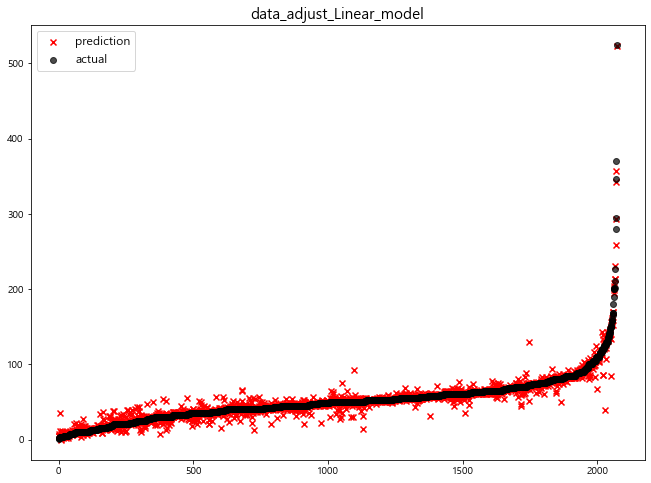

                      model        mse
0  data_adjust_Linear_model  39.697641


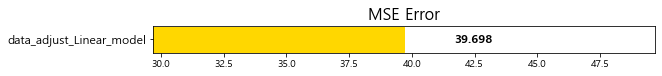

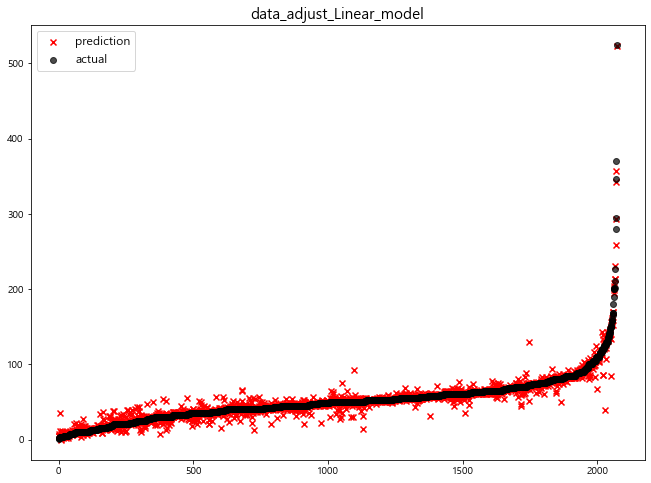

                      model        r2
0  data_adjust_Linear_model  0.958344


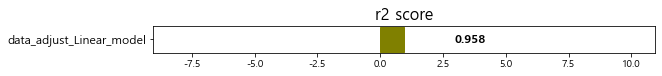

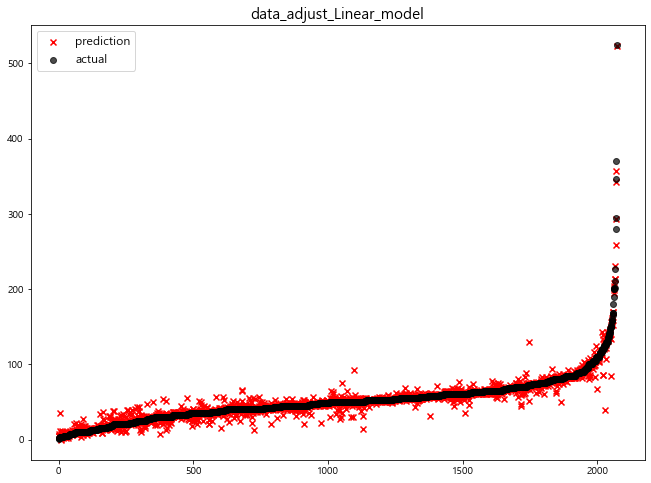

                      model       mae
0  data_adjust_Linear_model  3.443872


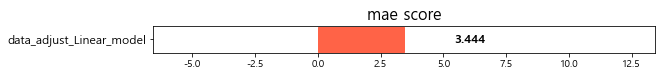

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
print('data_adjust_LinearRegression mse : ',mean_squared_error(y_test, pred))
print('우리가 임의로 정한 정확도 월세 오차 10이내 : ',(abs(y_test - pred)<10).mean())
print('data_adjust_r2_score : ', r2_score(y_test, pred))
add_model('data_adjust_Linear_model', pred, y_test)
plot_all()
add_r2_model('data_adjust_Linear_model', pred, y_test)
r2_plot_all()
add_mae_model('data_adjust_Linear_model', pred, y_test)
mae_plot_all()

In [158]:
# import matplotlib.pyplot as plt
# import numpy as np

In [159]:
# x = np.arange(503)
# plt.figure(figsize=(20, 20))
# plt.plot(x, pred, color='r', label='pred')   # 예측값
# plt.scatter(x, y_test, label='data')   # 실제값
# plt.legend(fontsize=18)
# plt.show()

### 2. DecisionTreeRegressor 모델 성능 평가

LinearRegression mse :  74.96548554752803
우리가 임의로 정한 tree 정확도 월세 오차 10이내 :  0.9068532818532818
tree_r2_score :  0.9232319469279227


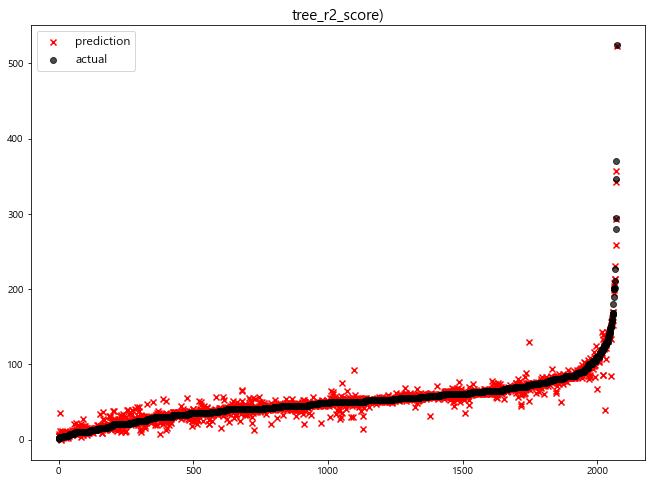

                      model        mse
0  data_adjust_Linear_model  39.697641
1                  tree_mse  39.697641


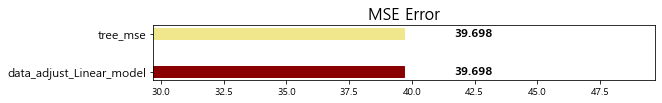

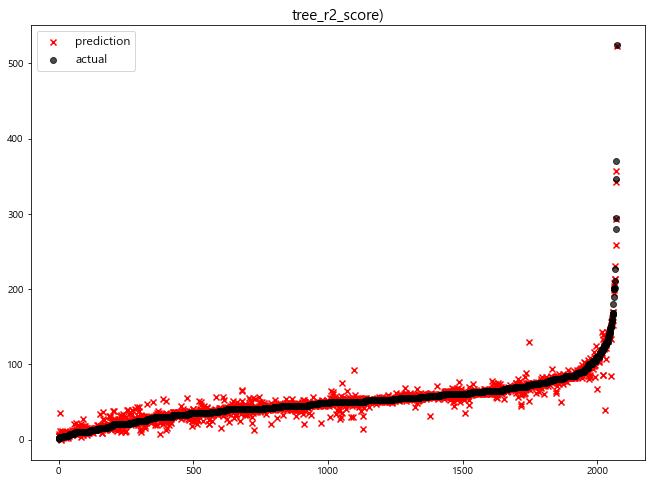

                      model        r2
0  data_adjust_Linear_model  0.958344
1            tree_r2_score)  0.958344


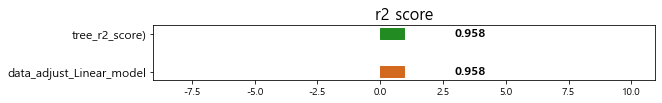

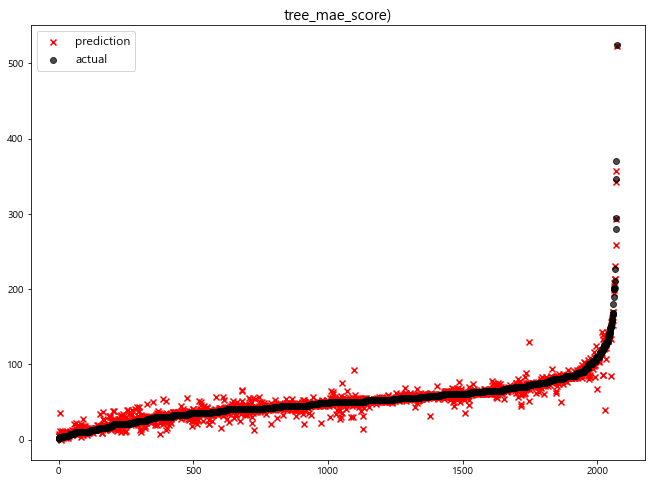

                      model       mae
0  data_adjust_Linear_model  3.443872
1           tree_mae_score)  3.443872


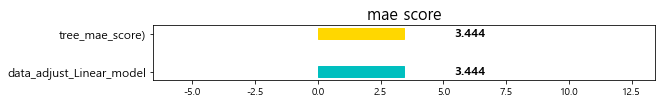

In [160]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor(max_depth=5, random_state=0, min_samples_split=10).fit(x_train, y_train)
tree_pred = treemodel.predict(x_test)
print('LinearRegression mse : ',mean_squared_error(y_test, tree_pred))
print('우리가 임의로 정한 tree 정확도 월세 오차 10이내 : ',(abs(y_test - tree_pred)<10).mean())
print('tree_r2_score : ', r2_score(y_test, tree_pred))
add_model('tree_mse', pred, y_test)
add_r2_model('tree_r2_score)', pred, y_test)
plot_all()
r2_plot_all()
add_mae_model('tree_mae_score)', pred, y_test)
mae_plot_all()

### 샘플 데이터 하나씩 뽑아보면서 확인해보기

In [161]:
# sampledata_y=y_test.iloc[[10],]
# print('임의로 뽑은 정답 데이터', sampledata_y)
# sampledata_x=x_test.iloc[[10],]
# sampledata_x[['종전 임대료', '종전 보증금', '보증금(만원)']]
# print('모델의 예측 결과 : ', model.predict(sampledata_x))

### 3. 라소 모델 돌리면서 지표들 시각화하기!

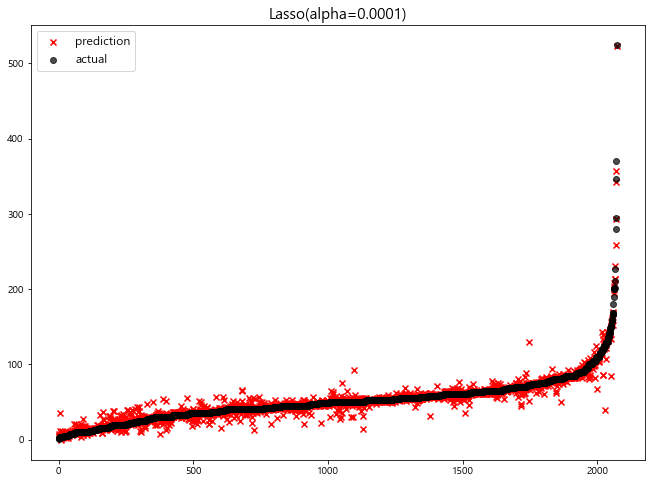

                      model        mse
0          Lasso(alpha=100)  44.335481
1  data_adjust_Linear_model  39.697641
2                  tree_mse  39.697641
3       Lasso(alpha=0.0001)  39.577619
4        Lasso(alpha=0.001)  38.847749
5           Lasso(alpha=10)  37.898024
6            Lasso(alpha=1)  37.816943
7          Lasso(alpha=0.1)  37.569772
8         Lasso(alpha=0.01)  37.563323


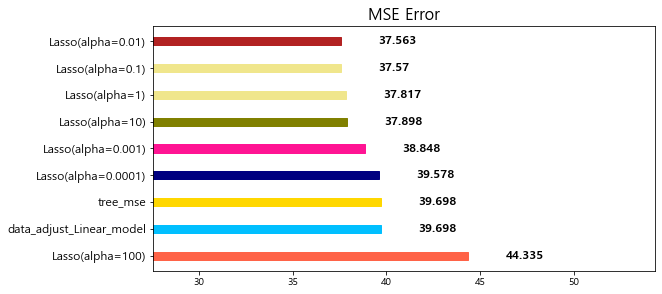

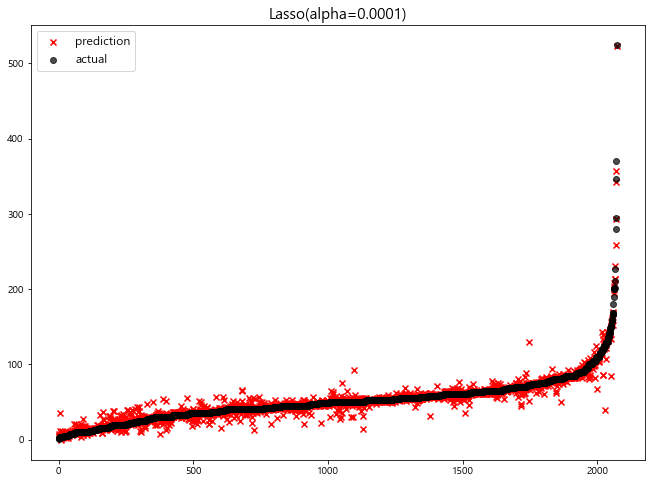

                      model        r2
0          Lasso(alpha=0.1)  0.960636
1         Lasso(alpha=0.01)  0.960559
2            Lasso(alpha=1)  0.960292
3           Lasso(alpha=10)  0.959536
4        Lasso(alpha=0.001)  0.959215
5       Lasso(alpha=0.0001)  0.958467
6  data_adjust_Linear_model  0.958344
7            tree_r2_score)  0.958344
8          Lasso(alpha=100)  0.944404


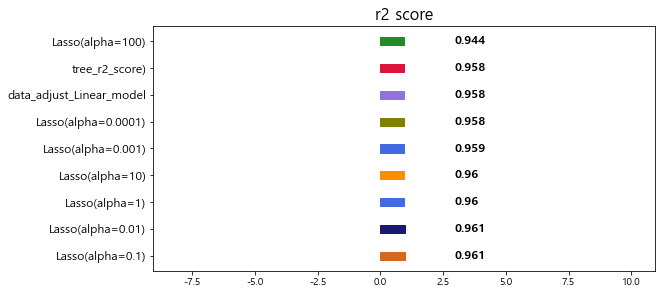

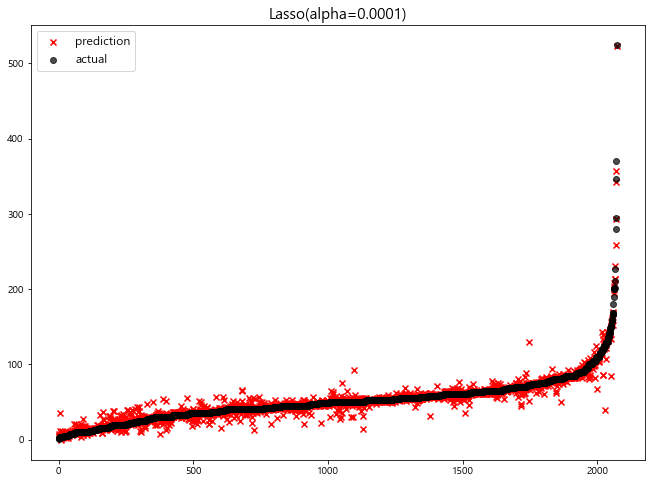

                      model       mae
0          Lasso(alpha=100)  3.742510
1  data_adjust_Linear_model  3.443872
2           tree_mae_score)  3.443872
3       Lasso(alpha=0.0001)  3.434808
4        Lasso(alpha=0.001)  3.374913
5            Lasso(alpha=1)  3.312615
6          Lasso(alpha=0.1)  3.299794
7         Lasso(alpha=0.01)  3.277204
8           Lasso(alpha=10)  3.220023


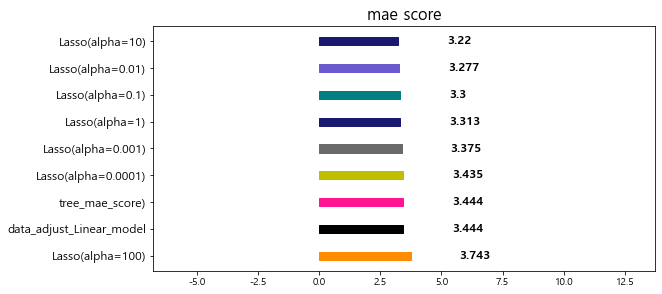

In [162]:
from sklearn.linear_model import Lasso
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_r2_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_mae_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### 4. Ridge 모델 확인 및 시각화

c:\Users\sujong\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30723e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\sujong\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30731e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\sujong\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30732e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


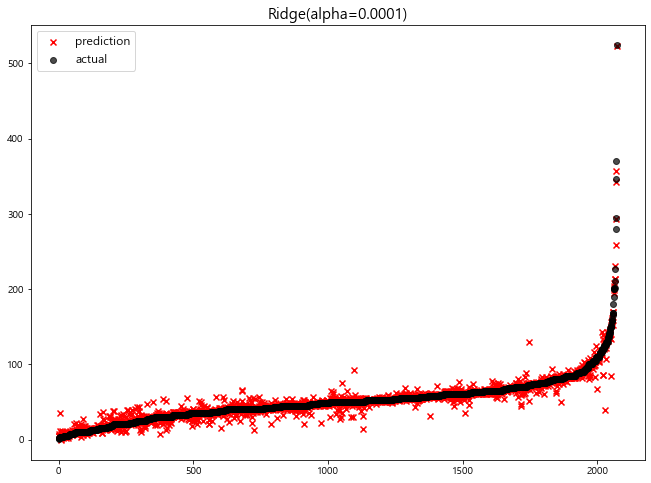

                       model        mse
0           Lasso(alpha=100)  44.335481
1   data_adjust_Linear_model  39.697641
2                   tree_mse  39.697641
3        Ridge(alpha=0.0001)  39.697534
4         Ridge(alpha=0.001)  39.696578
5          Ridge(alpha=0.01)  39.687090
6           Ridge(alpha=0.1)  39.599099
7        Lasso(alpha=0.0001)  39.577619
8             Ridge(alpha=1)  39.060026
9         Lasso(alpha=0.001)  38.847749
10           Lasso(alpha=10)  37.898024
11           Ridge(alpha=10)  37.875999
12            Lasso(alpha=1)  37.816943
13          Lasso(alpha=0.1)  37.569772
14         Lasso(alpha=0.01)  37.563323
15          Ridge(alpha=100)  37.327798


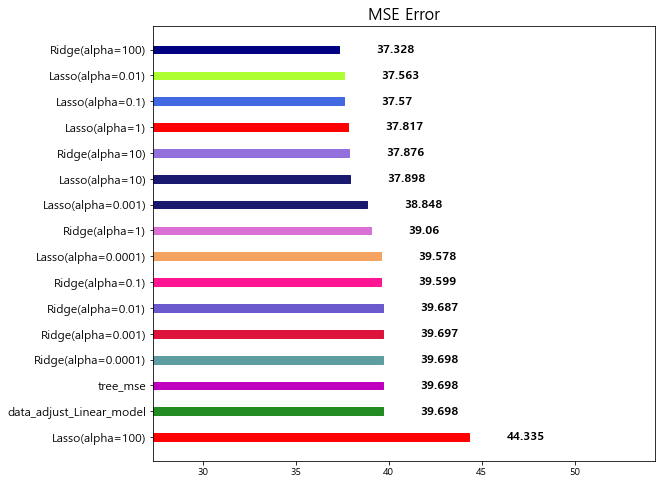

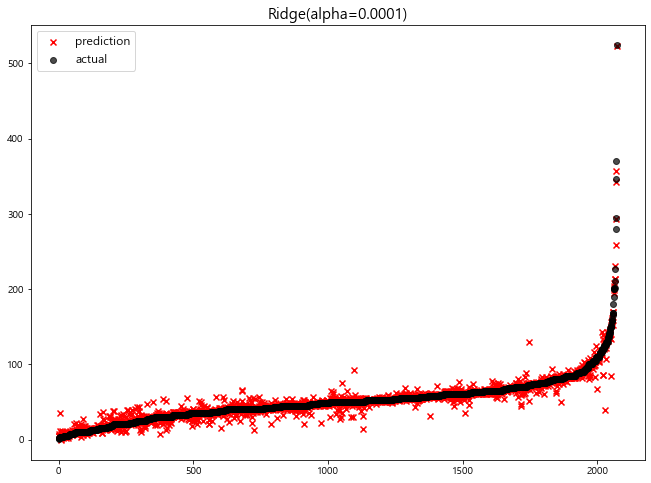

                       model        r2
0           Ridge(alpha=100)  0.960875
1           Lasso(alpha=0.1)  0.960636
2          Lasso(alpha=0.01)  0.960559
3             Lasso(alpha=1)  0.960292
4            Ridge(alpha=10)  0.960235
5            Lasso(alpha=10)  0.959536
6         Lasso(alpha=0.001)  0.959215
7             Ridge(alpha=1)  0.958991
8        Lasso(alpha=0.0001)  0.958467
9           Ridge(alpha=0.1)  0.958444
10         Ridge(alpha=0.01)  0.958355
11        Ridge(alpha=0.001)  0.958345
12       Ridge(alpha=0.0001)  0.958344
13  data_adjust_Linear_model  0.958344
14            tree_r2_score)  0.958344
15          Lasso(alpha=100)  0.944404


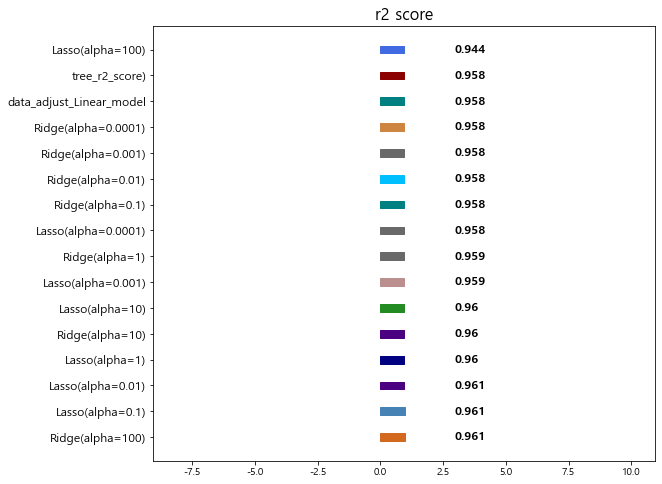

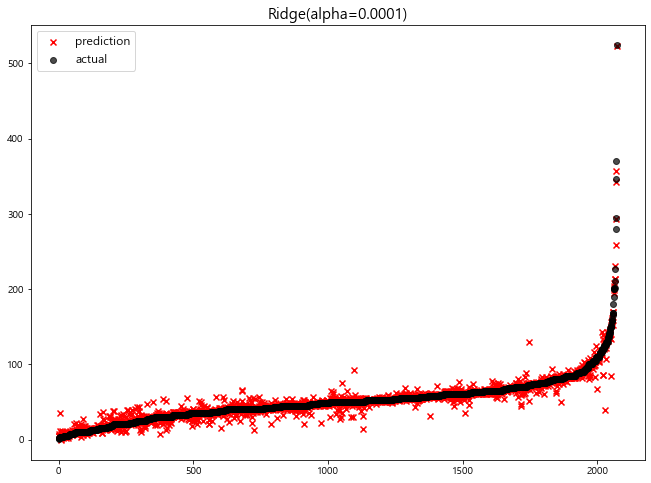

                       model       mae
0           Lasso(alpha=100)  3.742510
1   data_adjust_Linear_model  3.443872
2            tree_mae_score)  3.443872
3        Ridge(alpha=0.0001)  3.443866
4         Ridge(alpha=0.001)  3.443813
5          Ridge(alpha=0.01)  3.443288
6           Ridge(alpha=0.1)  3.438398
7        Lasso(alpha=0.0001)  3.434808
8             Ridge(alpha=1)  3.403934
9         Lasso(alpha=0.001)  3.374913
10            Lasso(alpha=1)  3.312615
11           Ridge(alpha=10)  3.310747
12          Lasso(alpha=0.1)  3.299794
13         Lasso(alpha=0.01)  3.277204
14          Ridge(alpha=100)  3.262077
15           Lasso(alpha=10)  3.220023


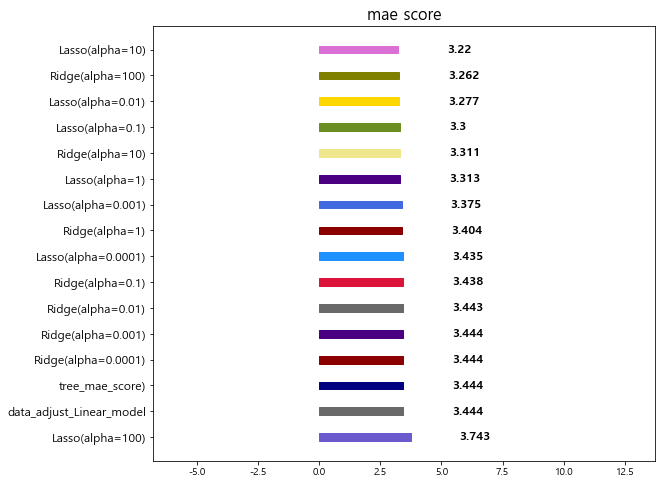

In [163]:
from sklearn.linear_model import Ridge
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_r2_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_mae_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### model의 계수 확인

In [164]:
plot_coef(x_train.columns, model.coef_)

KeyboardInterrupt: 

### 5. ElasticNet 모델 사용

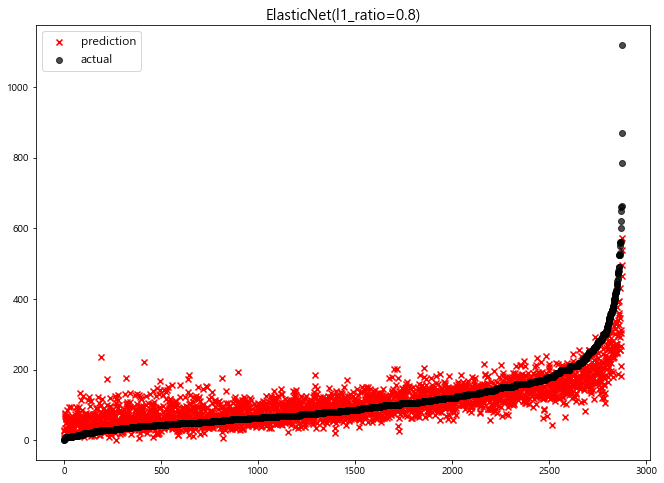

                       model           mse
0   data_adjust_Linear_model  8.458430e+10
1                   tree_mse  8.458430e+10
2           Lasso(alpha=100)  2.783823e+03
3            Lasso(alpha=10)  2.760260e+03
4   ElasticNet(l1_ratio=0.2)  2.562427e+03
5             Lasso(alpha=1)  2.533144e+03
6   ElasticNet(l1_ratio=0.5)  2.488216e+03
7   ElasticNet(l1_ratio=0.8)  2.307685e+03
8           Ridge(alpha=100)  2.116155e+03
9           Lasso(alpha=0.1)  1.981318e+03
10       Ridge(alpha=0.0001)  1.955232e+03
11        Ridge(alpha=0.001)  1.955161e+03
12         Ridge(alpha=0.01)  1.954456e+03
13       Lasso(alpha=0.0001)  1.954190e+03
14        Lasso(alpha=0.001)  1.948372e+03
15          Ridge(alpha=0.1)  1.948165e+03
16         Lasso(alpha=0.01)  1.924871e+03
17            Ridge(alpha=1)  1.918081e+03
18           Ridge(alpha=10)  1.883335e+03


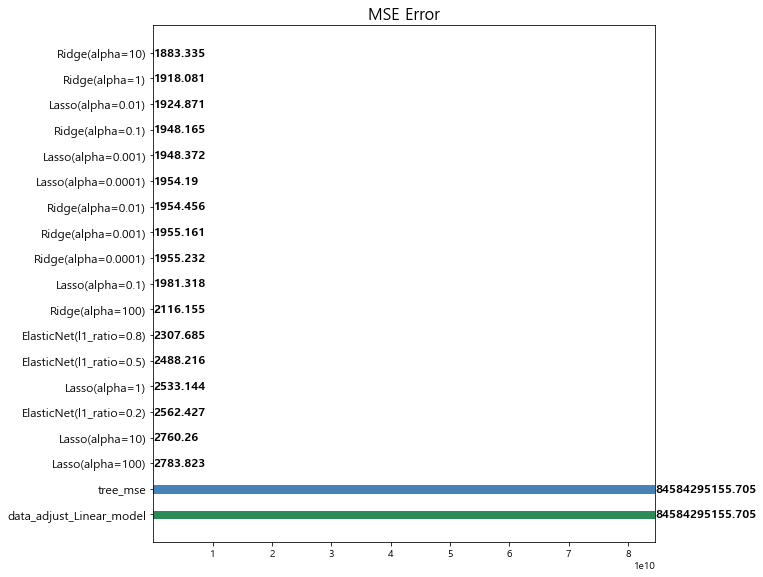

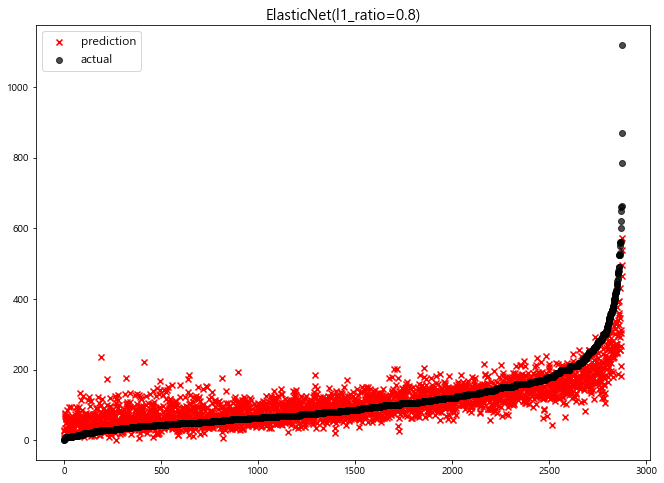

                       model        r2
0           Ridge(alpha=0.1)  0.611992
1        Lasso(alpha=0.0001)  0.611944
2          Ridge(alpha=0.01)  0.611879
3         Ridge(alpha=0.001)  0.611862
4        Ridge(alpha=0.0001)  0.611860
5         Lasso(alpha=0.001)  0.611730
6             Ridge(alpha=1)  0.610520
7          Lasso(alpha=0.01)  0.604289
8            Ridge(alpha=10)  0.581931
9           Lasso(alpha=0.1)  0.540248
10          Ridge(alpha=100)  0.394422
11  ElasticNet(l1_ratio=0.8)  0.289071
12            Lasso(alpha=1)  0.200959
13  ElasticNet(l1_ratio=0.5)  0.191535
14  ElasticNet(l1_ratio=0.2)  0.154242
15           Lasso(alpha=10)  0.031423
16  data_adjust_Linear_model -0.005147
17            tree_r2_score) -0.005147
18          Lasso(alpha=100) -0.253122


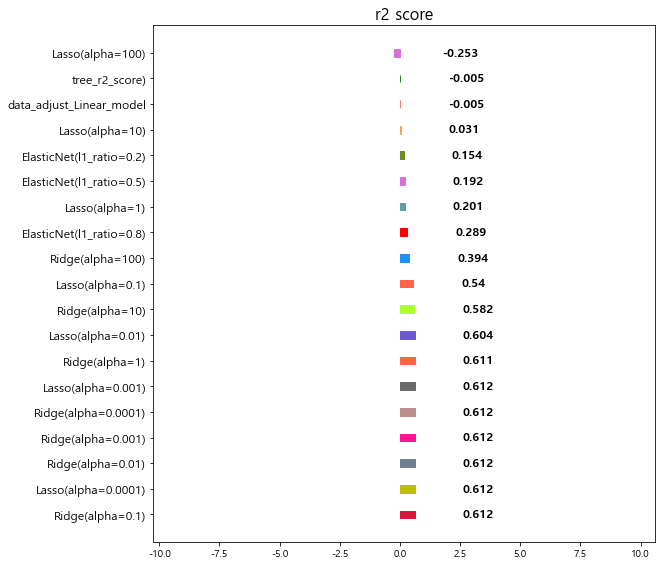

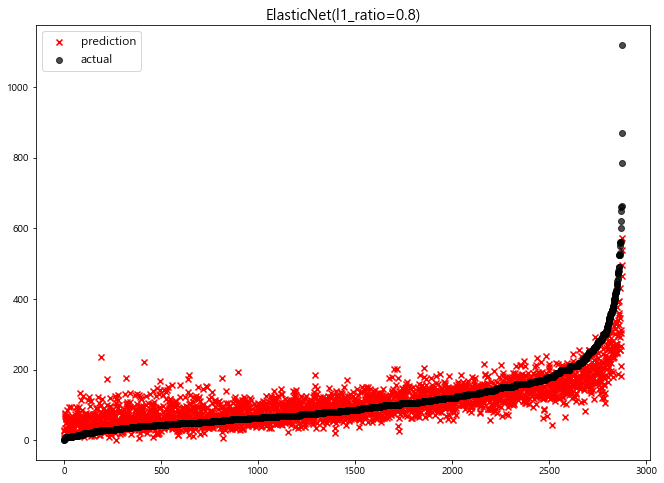

                       model           mae
0   data_adjust_Linear_model  20874.362197
1            tree_mae_score)  20874.362197
2            Lasso(alpha=10)     34.958310
3           Lasso(alpha=100)     34.342563
4             Lasso(alpha=1)     33.932155
5   ElasticNet(l1_ratio=0.2)     33.538531
6   ElasticNet(l1_ratio=0.5)     32.989144
7   ElasticNet(l1_ratio=0.8)     31.639308
8           Ridge(alpha=100)     29.922301
9           Lasso(alpha=0.1)     29.100128
10       Ridge(alpha=0.0001)     28.549936
11        Ridge(alpha=0.001)     28.549587
12         Ridge(alpha=0.01)     28.546115
13       Lasso(alpha=0.0001)     28.537438
14          Ridge(alpha=0.1)     28.513532
15        Lasso(alpha=0.001)     28.478123
16            Ridge(alpha=1)     28.326619
17         Lasso(alpha=0.01)     28.326387
18           Ridge(alpha=10)     27.987204


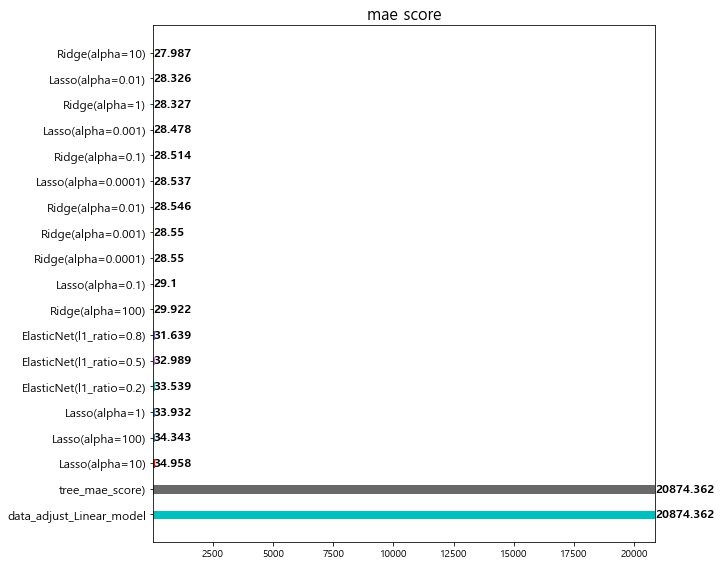

In [ ]:
from sklearn.linear_model import ElasticNet

# 이번에는 alpha값을 고정시키겠다.
alpha = 0.1

#l1_ratio값을 다르게 하면서 모델의 하이브리드 성능을 예측, 관찰
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:   
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
    add_r2_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
    add_mae_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

## 파이프라인 (pipeline)
- Scaler 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

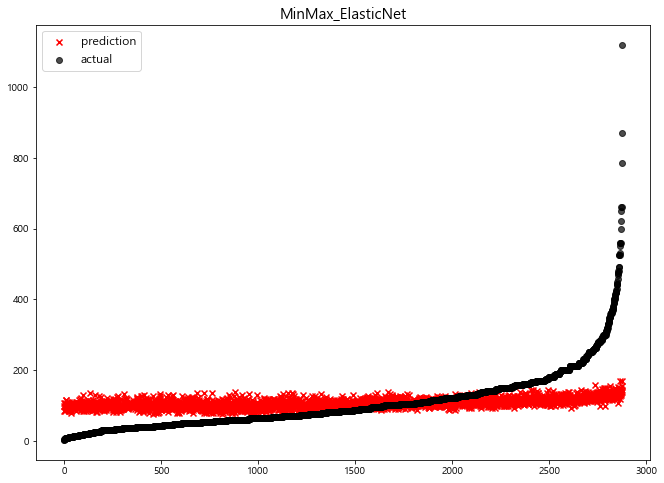

                       model           mse
0   data_adjust_Linear_model  8.458430e+10
1                   tree_mse  8.458430e+10
2          MinMax_ElasticNet  6.132968e+03
3           Lasso(alpha=100)  2.783823e+03
4            Lasso(alpha=10)  2.760260e+03
5   ElasticNet(l1_ratio=0.2)  2.562427e+03
6             Lasso(alpha=1)  2.533144e+03
7   ElasticNet(l1_ratio=0.5)  2.488216e+03
8   ElasticNet(l1_ratio=0.8)  2.307685e+03
9           Ridge(alpha=100)  2.116155e+03
10          Lasso(alpha=0.1)  1.981318e+03
11       Ridge(alpha=0.0001)  1.955232e+03
12        Ridge(alpha=0.001)  1.955161e+03
13         Ridge(alpha=0.01)  1.954456e+03
14       Lasso(alpha=0.0001)  1.954190e+03
15        Lasso(alpha=0.001)  1.948372e+03
16          Ridge(alpha=0.1)  1.948165e+03
17         Lasso(alpha=0.01)  1.924871e+03
18            Ridge(alpha=1)  1.918081e+03
19           Ridge(alpha=10)  1.883335e+03


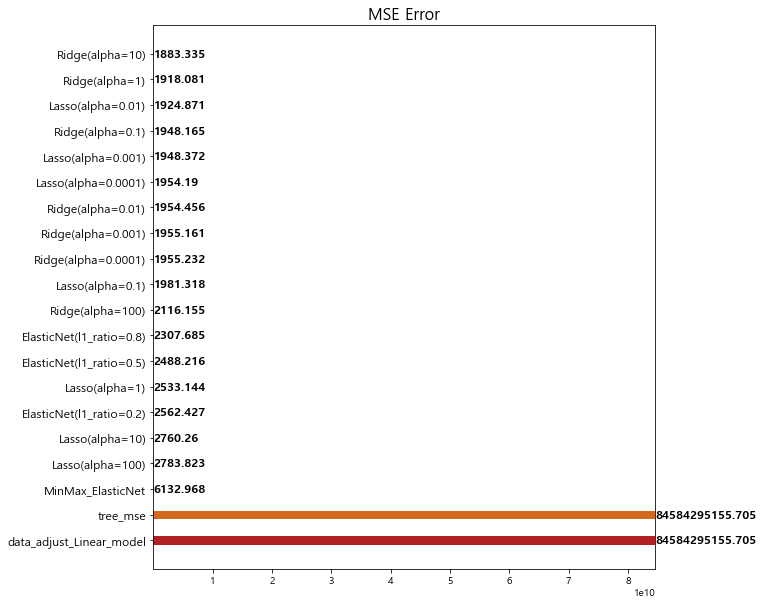

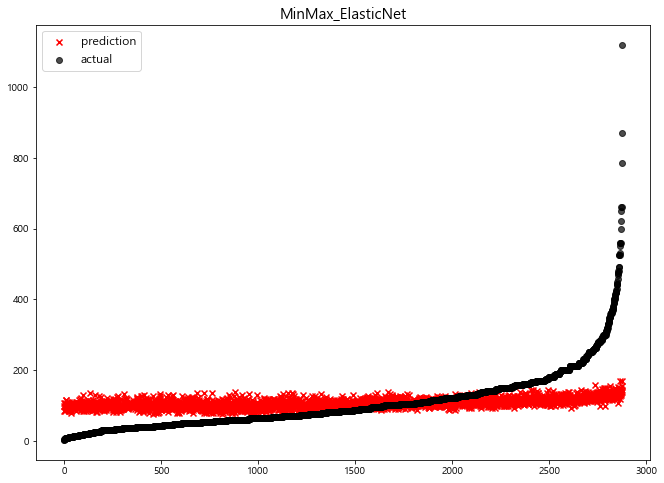

                       model         r2
0           Ridge(alpha=0.1)   0.611992
1        Lasso(alpha=0.0001)   0.611944
2          Ridge(alpha=0.01)   0.611879
3         Ridge(alpha=0.001)   0.611862
4        Ridge(alpha=0.0001)   0.611860
5         Lasso(alpha=0.001)   0.611730
6             Ridge(alpha=1)   0.610520
7          Lasso(alpha=0.01)   0.604289
8            Ridge(alpha=10)   0.581931
9           Lasso(alpha=0.1)   0.540248
10          Ridge(alpha=100)   0.394422
11  ElasticNet(l1_ratio=0.8)   0.289071
12            Lasso(alpha=1)   0.200959
13  ElasticNet(l1_ratio=0.5)   0.191535
14  ElasticNet(l1_ratio=0.2)   0.154242
15           Lasso(alpha=10)   0.031423
16  data_adjust_Linear_model  -0.005147
17            tree_r2_score)  -0.005147
18          Lasso(alpha=100)  -0.253122
19         MinMax_ElasticNet -37.334603


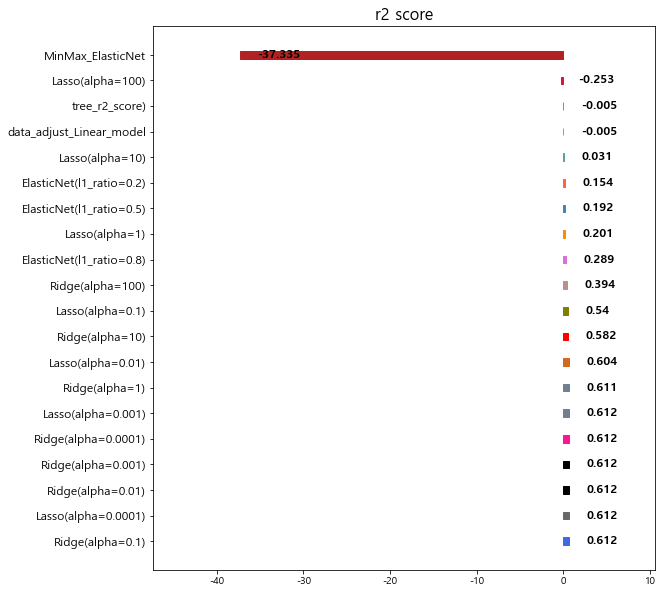

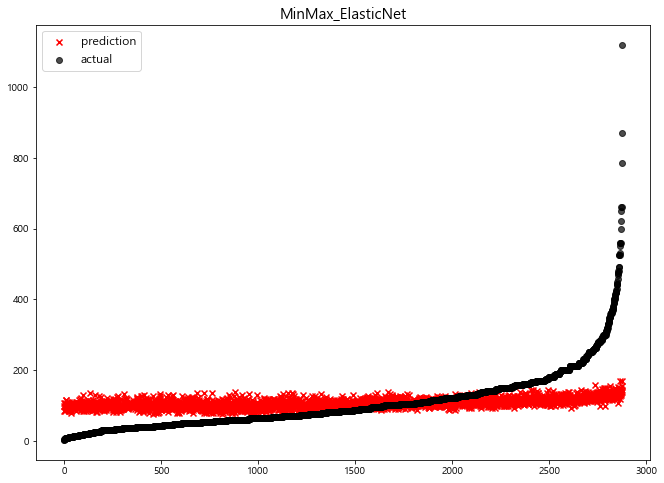

                       model           mae
0   data_adjust_Linear_model  20874.362197
1            tree_mae_score)  20874.362197
2          MinMax_ElasticNet     52.995055
3            Lasso(alpha=10)     34.958310
4           Lasso(alpha=100)     34.342563
5             Lasso(alpha=1)     33.932155
6   ElasticNet(l1_ratio=0.2)     33.538531
7   ElasticNet(l1_ratio=0.5)     32.989144
8   ElasticNet(l1_ratio=0.8)     31.639308
9           Ridge(alpha=100)     29.922301
10          Lasso(alpha=0.1)     29.100128
11       Ridge(alpha=0.0001)     28.549936
12        Ridge(alpha=0.001)     28.549587
13         Ridge(alpha=0.01)     28.546115
14       Lasso(alpha=0.0001)     28.537438
15          Ridge(alpha=0.1)     28.513532
16        Lasso(alpha=0.001)     28.478123
17            Ridge(alpha=1)     28.326619
18         Lasso(alpha=0.01)     28.326387
19           Ridge(alpha=10)     27.987204


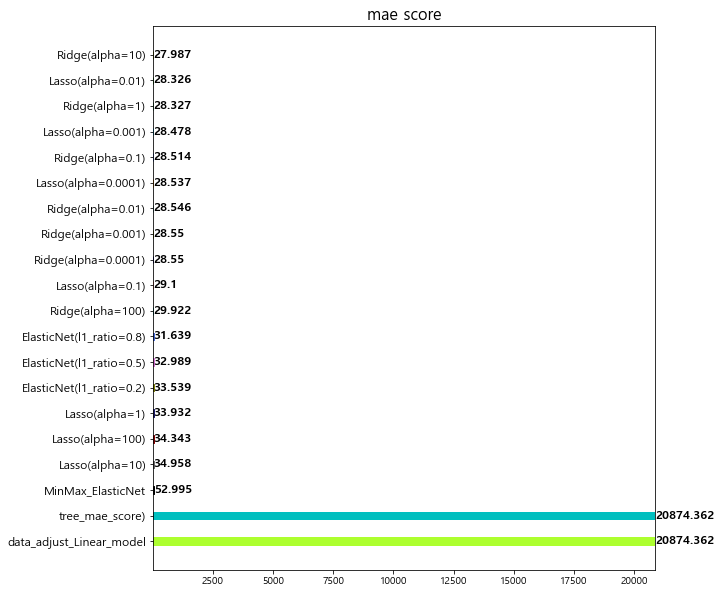

In [ ]:
elastic_pipeline = make_pipeline(
   MinMaxScaler(),
   ElasticNet(alpha=0.1, l1_ratio=0.2),
)
elastic_pipeline.fit(x_train, y_train)
elastic_pipeline_pred = elastic_pipeline.predict(x_test)
add_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
add_r2_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
add_mae_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

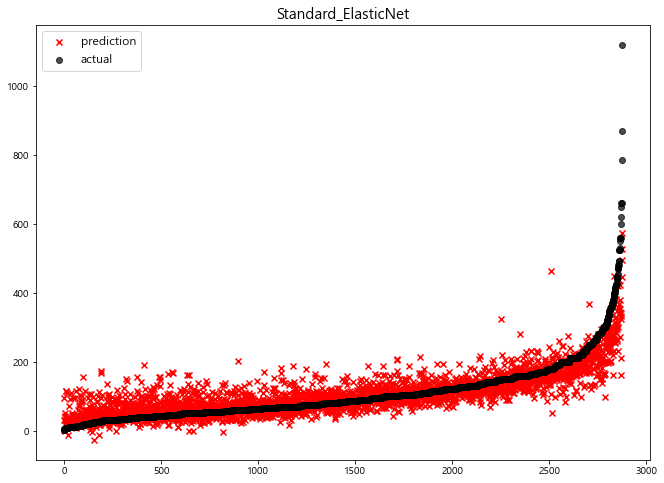

                       model           mse
0   data_adjust_Linear_model  8.458430e+10
1                   tree_mse  8.458430e+10
2          MinMax_ElasticNet  6.132968e+03
3           Lasso(alpha=100)  2.783823e+03
4            Lasso(alpha=10)  2.760260e+03
5   ElasticNet(l1_ratio=0.2)  2.562427e+03
6             Lasso(alpha=1)  2.533144e+03
7   ElasticNet(l1_ratio=0.5)  2.488216e+03
8   ElasticNet(l1_ratio=0.8)  2.307685e+03
9           Ridge(alpha=100)  2.116155e+03
10          Lasso(alpha=0.1)  1.981318e+03
11       Standard_ElasticNet  1.965497e+03
12       Ridge(alpha=0.0001)  1.955232e+03
13        Ridge(alpha=0.001)  1.955161e+03
14         Ridge(alpha=0.01)  1.954456e+03
15       Lasso(alpha=0.0001)  1.954190e+03
16        Lasso(alpha=0.001)  1.948372e+03
17          Ridge(alpha=0.1)  1.948165e+03
18         Lasso(alpha=0.01)  1.924871e+03
19            Ridge(alpha=1)  1.918081e+03
20           Ridge(alpha=10)  1.883335e+03


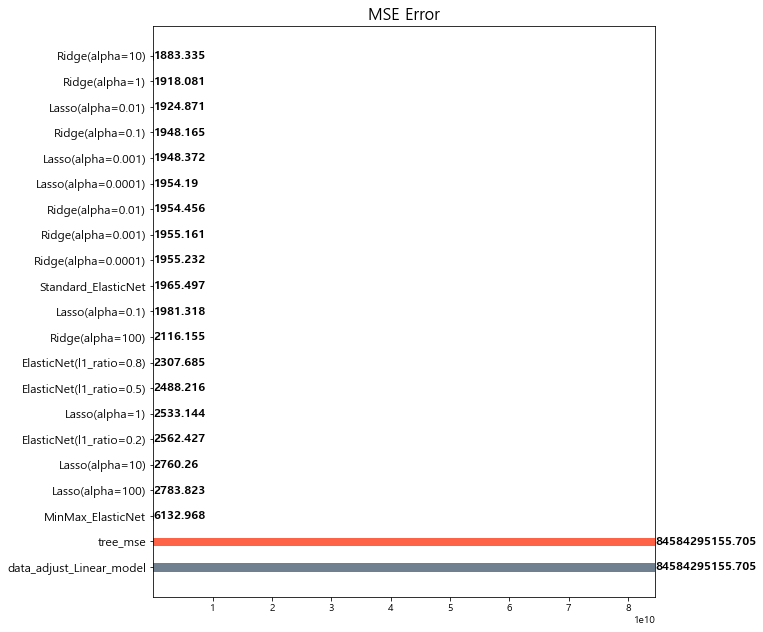

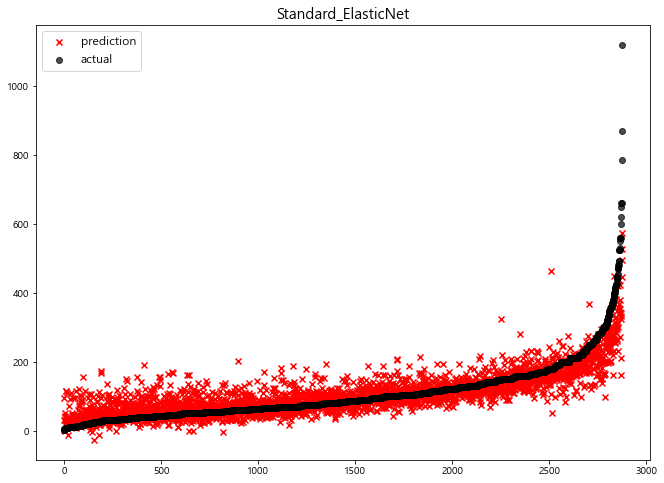

                       model         r2
0           Ridge(alpha=0.1)   0.611992
1        Lasso(alpha=0.0001)   0.611944
2          Ridge(alpha=0.01)   0.611879
3         Ridge(alpha=0.001)   0.611862
4        Ridge(alpha=0.0001)   0.611860
5         Lasso(alpha=0.001)   0.611730
6             Ridge(alpha=1)   0.610520
7          Lasso(alpha=0.01)   0.604289
8            Ridge(alpha=10)   0.581931
9           Lasso(alpha=0.1)   0.540248
10       Standard_ElasticNet   0.506216
11          Ridge(alpha=100)   0.394422
12  ElasticNet(l1_ratio=0.8)   0.289071
13            Lasso(alpha=1)   0.200959
14  ElasticNet(l1_ratio=0.5)   0.191535
15  ElasticNet(l1_ratio=0.2)   0.154242
16           Lasso(alpha=10)   0.031423
17  data_adjust_Linear_model  -0.005147
18            tree_r2_score)  -0.005147
19          Lasso(alpha=100)  -0.253122
20         MinMax_ElasticNet -37.334603


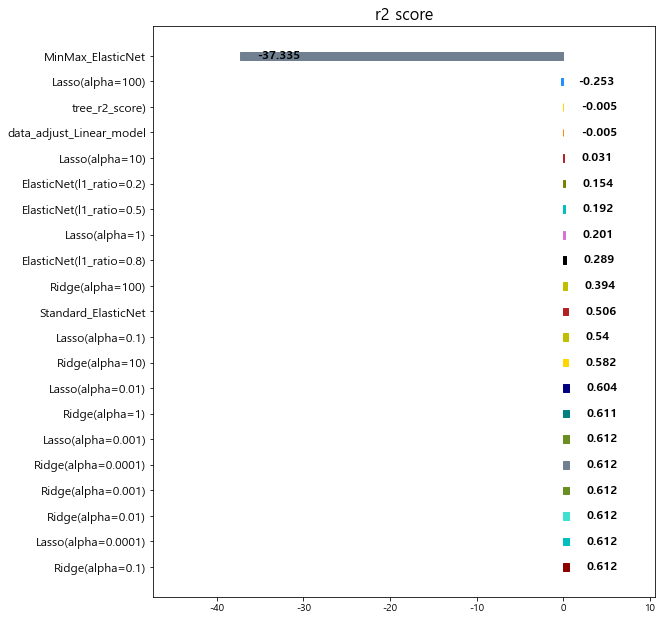

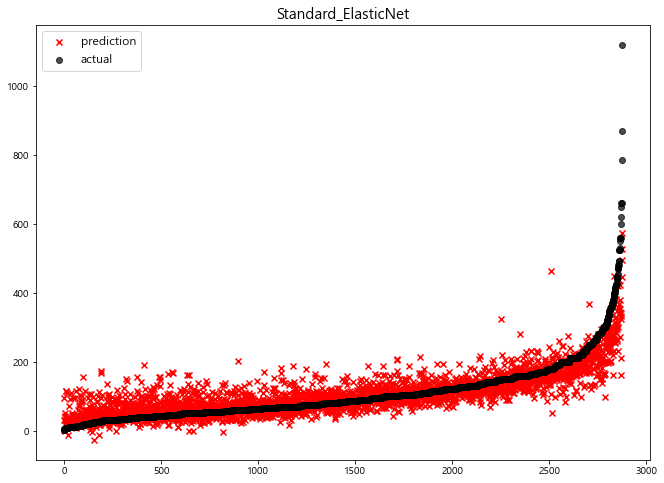

                       model           mae
0   data_adjust_Linear_model  20874.362197
1            tree_mae_score)  20874.362197
2          MinMax_ElasticNet     52.995055
3            Lasso(alpha=10)     34.958310
4           Lasso(alpha=100)     34.342563
5             Lasso(alpha=1)     33.932155
6   ElasticNet(l1_ratio=0.2)     33.538531
7   ElasticNet(l1_ratio=0.5)     32.989144
8   ElasticNet(l1_ratio=0.8)     31.639308
9           Ridge(alpha=100)     29.922301
10          Lasso(alpha=0.1)     29.100128
11       Ridge(alpha=0.0001)     28.549936
12        Ridge(alpha=0.001)     28.549587
13         Ridge(alpha=0.01)     28.546115
14       Lasso(alpha=0.0001)     28.537438
15          Ridge(alpha=0.1)     28.513532
16        Lasso(alpha=0.001)     28.478123
17            Ridge(alpha=1)     28.326619
18         Lasso(alpha=0.01)     28.326387
19       Standard_ElasticNet     27.992383
20           Ridge(alpha=10)     27.987204


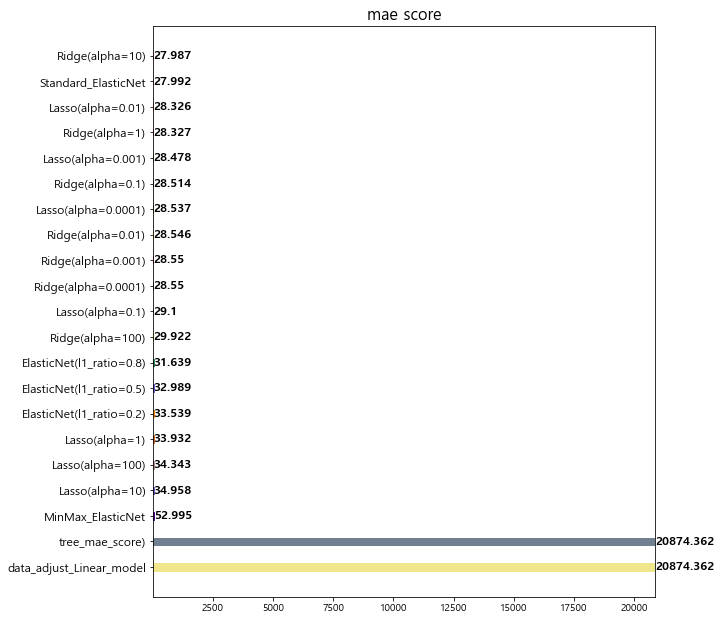

In [ ]:
pipeline = make_pipeline(
   StandardScaler(),
   ElasticNet(alpha=0.1, l1_ratio=0.2)
)
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)
add_model('Standard_ElasticNet', pipeline_pred, y_test)
add_r2_model('Standard_ElasticNet', pipeline_pred, y_test)
add_mae_model('Standard_ElasticNet', pipeline_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### 6. PolynomialFeature 추가 모델

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

c:\Users\sujong\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+06, tolerance: 6.377e+03
  model = cd_fast.enet_coordinate_descent(


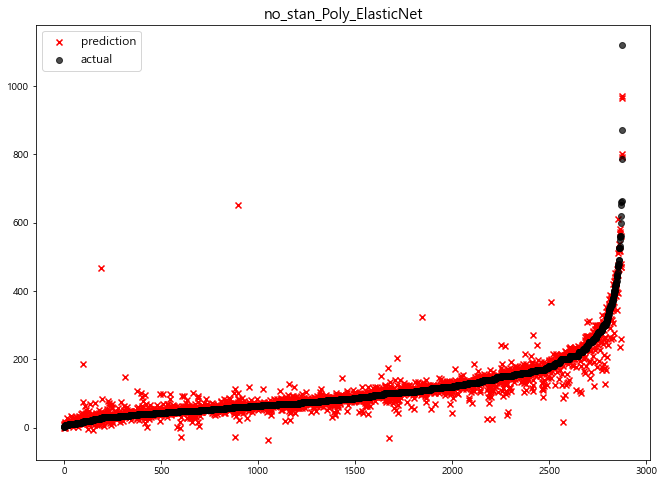

                       model           mse
0   data_adjust_Linear_model  8.458430e+10
1                   tree_mse  8.458430e+10
2          MinMax_ElasticNet  6.132968e+03
3           Lasso(alpha=100)  2.783823e+03
4            Lasso(alpha=10)  2.760260e+03
5   ElasticNet(l1_ratio=0.2)  2.562427e+03
6             Lasso(alpha=1)  2.533144e+03
7   ElasticNet(l1_ratio=0.5)  2.488216e+03
8   ElasticNet(l1_ratio=0.8)  2.307685e+03
9           Ridge(alpha=100)  2.116155e+03
10          Lasso(alpha=0.1)  1.981318e+03
11       Standard_ElasticNet  1.965497e+03
12       Ridge(alpha=0.0001)  1.955232e+03
13        Ridge(alpha=0.001)  1.955161e+03
14         Ridge(alpha=0.01)  1.954456e+03
15       Lasso(alpha=0.0001)  1.954190e+03
16        Lasso(alpha=0.001)  1.948372e+03
17          Ridge(alpha=0.1)  1.948165e+03
18         Lasso(alpha=0.01)  1.924871e+03
19            Ridge(alpha=1)  1.918081e+03
20           Ridge(alpha=10)  1.883335e+03
21   no_stan_Poly_ElasticNet  7.383800e+02


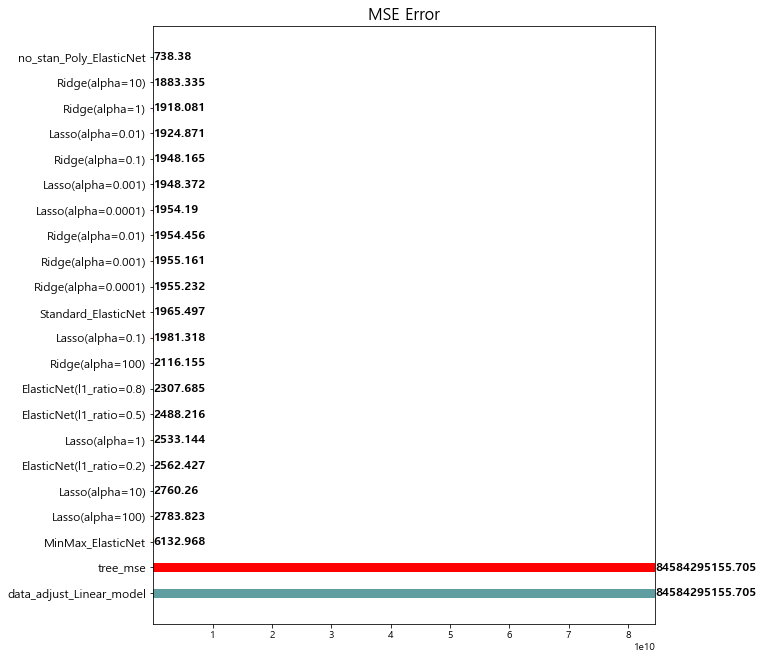

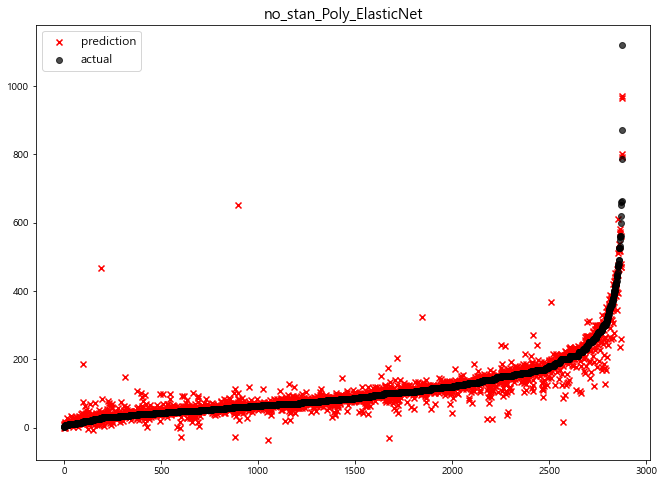

                       model         r2
0    no_stan_Poly_ElasticNet   0.895729
1           Ridge(alpha=0.1)   0.611992
2        Lasso(alpha=0.0001)   0.611944
3          Ridge(alpha=0.01)   0.611879
4         Ridge(alpha=0.001)   0.611862
5        Ridge(alpha=0.0001)   0.611860
6         Lasso(alpha=0.001)   0.611730
7             Ridge(alpha=1)   0.610520
8          Lasso(alpha=0.01)   0.604289
9            Ridge(alpha=10)   0.581931
10          Lasso(alpha=0.1)   0.540248
11       Standard_ElasticNet   0.506216
12          Ridge(alpha=100)   0.394422
13  ElasticNet(l1_ratio=0.8)   0.289071
14            Lasso(alpha=1)   0.200959
15  ElasticNet(l1_ratio=0.5)   0.191535
16  ElasticNet(l1_ratio=0.2)   0.154242
17           Lasso(alpha=10)   0.031423
18  data_adjust_Linear_model  -0.005147
19            tree_r2_score)  -0.005147
20          Lasso(alpha=100)  -0.253122
21         MinMax_ElasticNet -37.334603


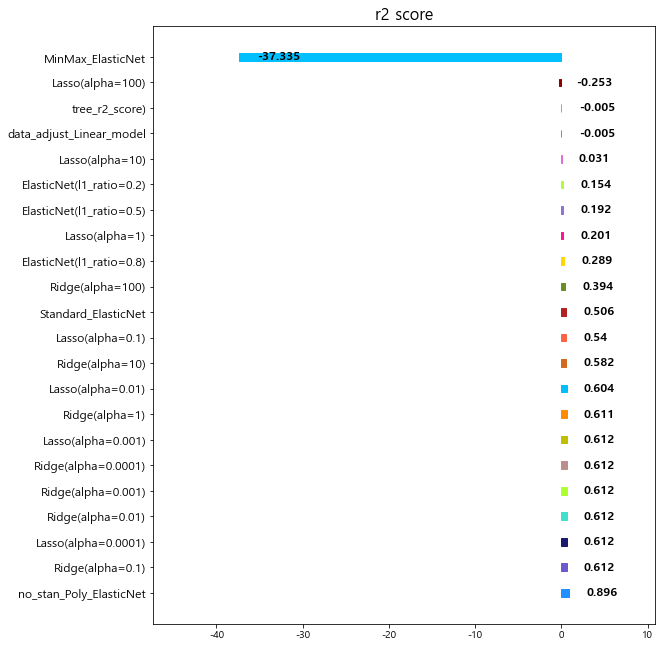

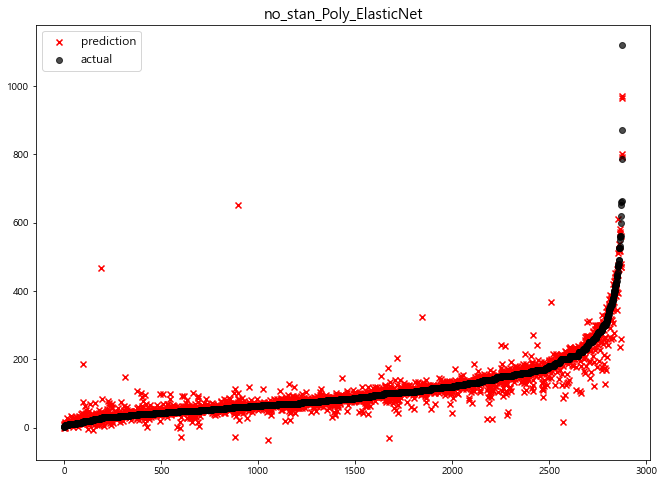

                       model           mae
0   data_adjust_Linear_model  20874.362197
1            tree_mae_score)  20874.362197
2          MinMax_ElasticNet     52.995055
3            Lasso(alpha=10)     34.958310
4           Lasso(alpha=100)     34.342563
5             Lasso(alpha=1)     33.932155
6   ElasticNet(l1_ratio=0.2)     33.538531
7   ElasticNet(l1_ratio=0.5)     32.989144
8   ElasticNet(l1_ratio=0.8)     31.639308
9           Ridge(alpha=100)     29.922301
10          Lasso(alpha=0.1)     29.100128
11       Ridge(alpha=0.0001)     28.549936
12        Ridge(alpha=0.001)     28.549587
13         Ridge(alpha=0.01)     28.546115
14       Lasso(alpha=0.0001)     28.537438
15          Ridge(alpha=0.1)     28.513532
16        Lasso(alpha=0.001)     28.478123
17            Ridge(alpha=1)     28.326619
18         Lasso(alpha=0.01)     28.326387
19       Standard_ElasticNet     27.992383
20           Ridge(alpha=10)     27.987204
21   no_stan_Poly_ElasticNet     12.186576


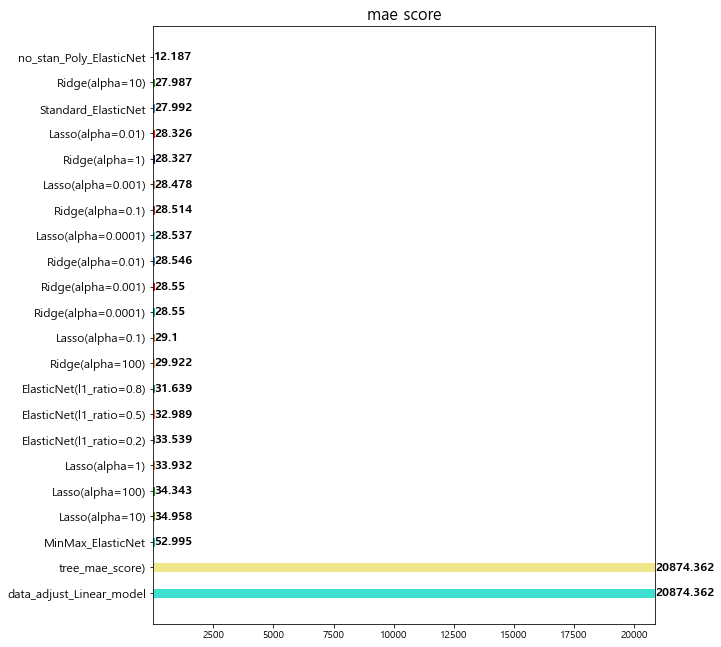

In [ ]:
poly_pipeline = make_pipeline(
    # StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2),
)
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)
add_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
add_r2_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
add_mae_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()